## In this Dataset we have to predict whether the person is subcribed a fixed deposit(FD) or not,here we use classification algorithm to predict.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:\\Abhi reddy\\ExcelR\\bank-full.csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df1=df.drop(['contact','default'],axis=1)

In [6]:
df2=df1.rename({'y':'Subcribed_FD'},axis=1)

In [7]:
df3=df2['Subcribed_FD'].map({'no':0,'yes':1})

In [8]:
df3.head()

0    0
1    0
2    0
3    0
4    0
Name: Subcribed_FD, dtype: int64

In [9]:
df4=pd.concat([df1,df3],axis=1)
df4.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,Subcribed_FD
0,58,management,married,tertiary,2143,yes,no,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,29,yes,no,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,2,yes,yes,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,1506,yes,no,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,1,no,no,5,may,198,1,-1,0,unknown,no,0


In [10]:
df5=df4.drop('y',axis=1)
df5.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subcribed_FD
0,58,management,married,tertiary,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,no,5,may,198,1,-1,0,unknown,0


In [11]:
df5.isnull().sum()

age             0
job             0
marital         0
education       0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
Subcribed_FD    0
dtype: int64

In [12]:
dupes=df5.duplicated()
sum(dupes)

0

In [13]:
df5.corr()

,age,balance,day,duration,campaign,pdays,previous,Subcribed_FD
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Subcribed_FD,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


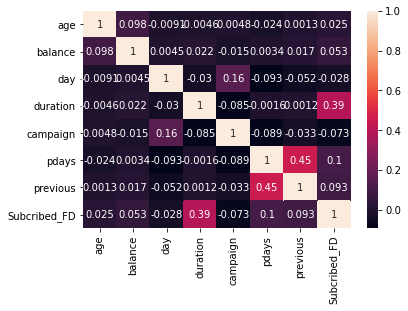

In [14]:
sns.heatmap(df5.corr(),annot=True)
plt.show()

In [15]:
df5.describe()

,age,balance,day,duration,campaign,pdays,previous,Subcribed_FD
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


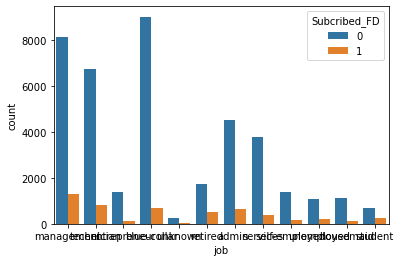

In [16]:
sns.countplot(x='job',hue='Subcribed_FD',data=df5)
plt.show()

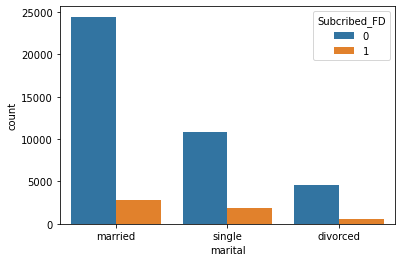

In [17]:
sns.countplot(x='marital',hue='Subcribed_FD',data=df5)
plt.show()

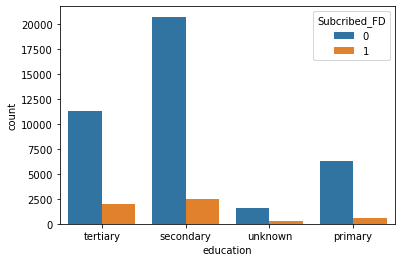

In [18]:
sns.countplot(x='education',hue='Subcribed_FD',data=df5)
plt.show()

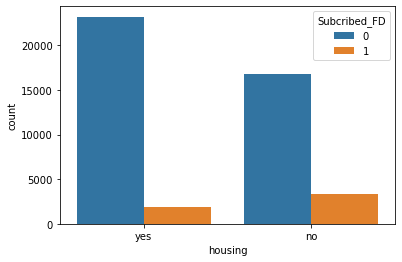

In [19]:
sns.countplot(x='housing',hue='Subcribed_FD',data=df5)
plt.show()

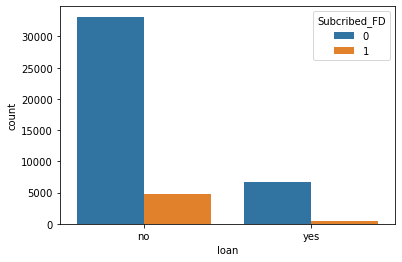

In [20]:
sns.countplot(x='loan',hue='Subcribed_FD',data=df5)
plt.show()

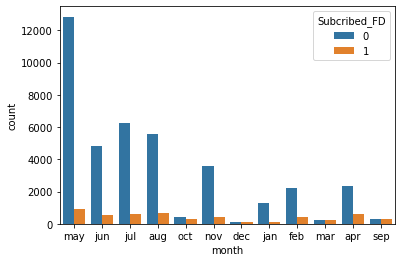

In [21]:
sns.countplot(x='month',hue='Subcribed_FD',data=df5)
plt.show()

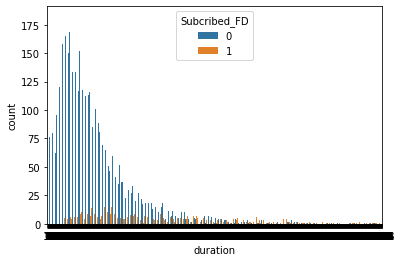

In [22]:
sns.countplot(x='duration',hue='Subcribed_FD',data=df5)
plt.show()

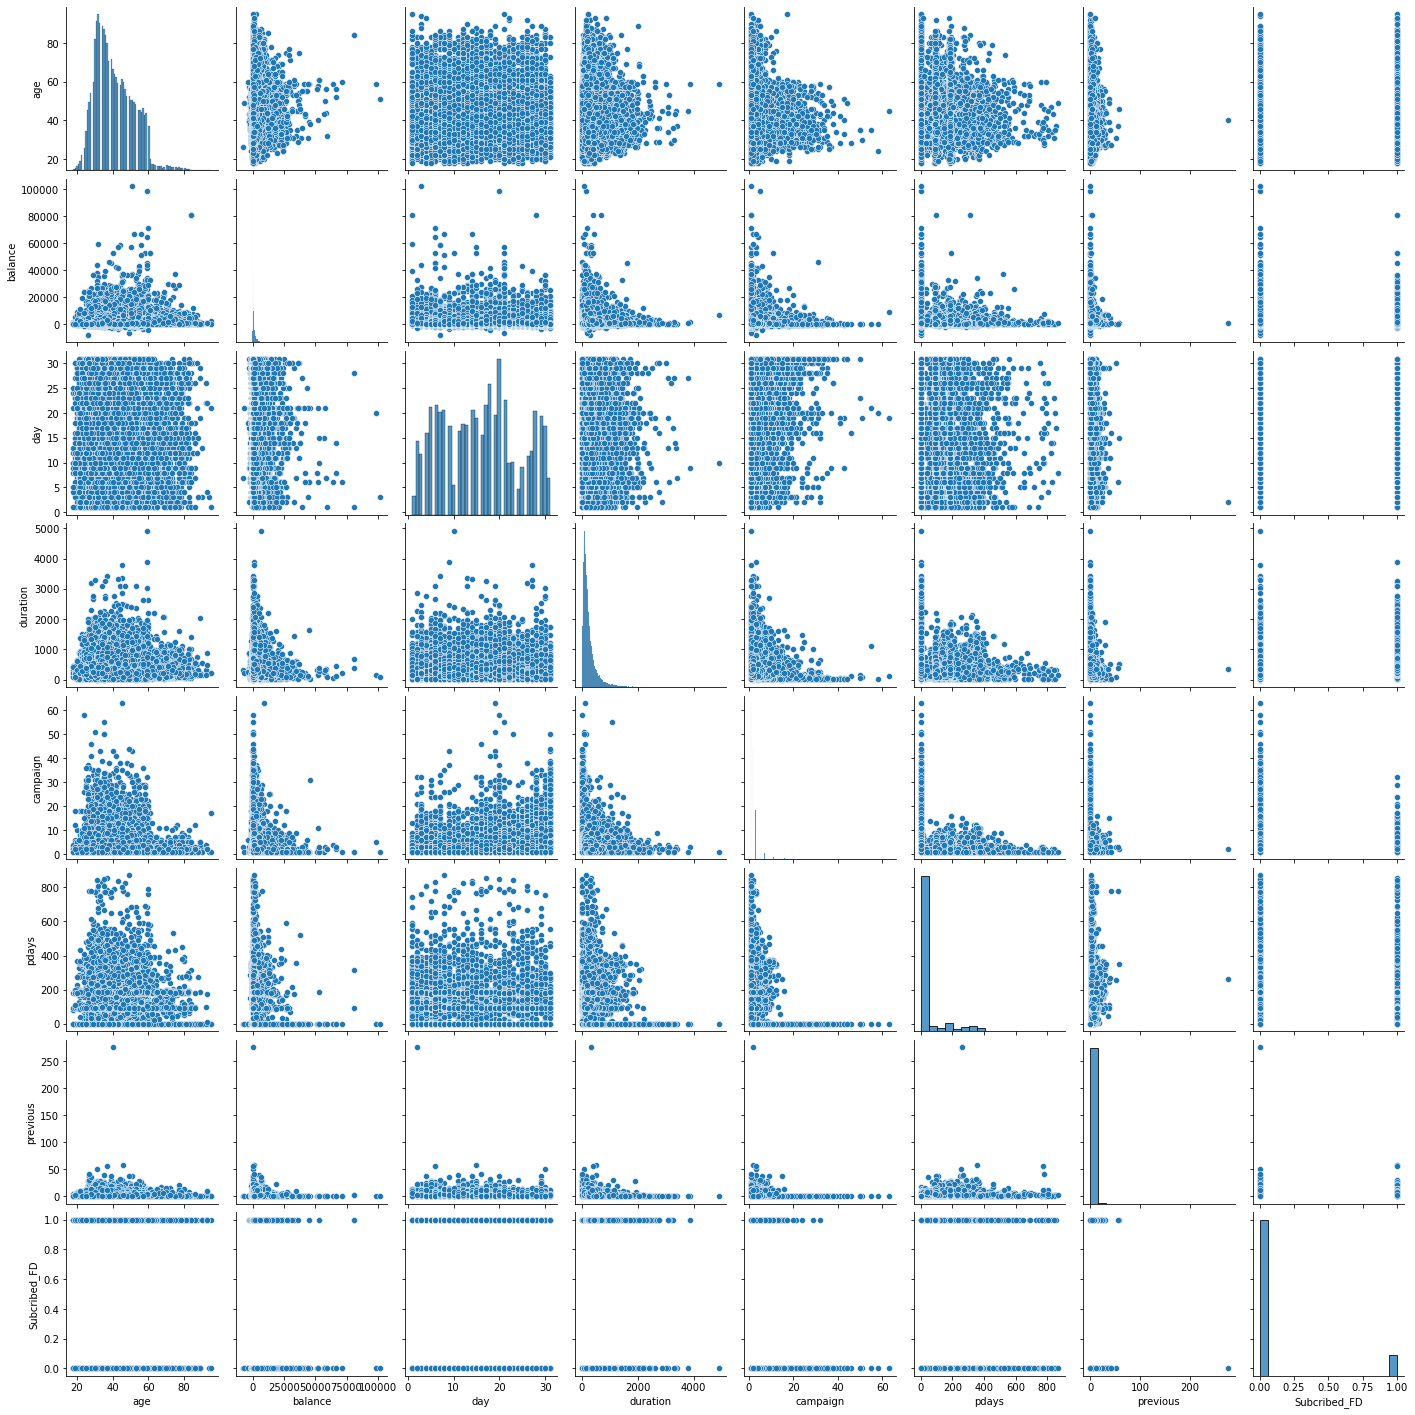

In [23]:
sns.pairplot(df5)
plt.show()

In [24]:
job1=pd.get_dummies(df5['job'],drop_first=True)
marital1=pd.get_dummies(df5['marital'],drop_first=True)
education1=pd.get_dummies(df5['education'],drop_first=True)
housing1=pd.get_dummies(df5['housing'],drop_first=True)
loan1=pd.get_dummies(df5['loan'],drop_first=True)
month1=pd.get_dummies(df5['month'],drop_first=True)
poutcome1=pd.get_dummies(df5['poutcome'],drop_first=True)
previous1=pd.get_dummies(df5['previous'],drop_first=True)

In [25]:
df6=pd.concat([df5,job1,marital1,education1,housing1,loan1,month1,poutcome1,previous1],axis=1)
df6.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,...,32,35,37,38,40,41,51,55,58,275
0,58,management,married,tertiary,2143,yes,no,5,may,261,...,0,0,0,0,0,0,0,0,0,0
1,44,technician,single,secondary,29,yes,no,5,may,151,...,0,0,0,0,0,0,0,0,0,0
2,33,entrepreneur,married,secondary,2,yes,yes,5,may,76,...,0,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,1506,yes,no,5,may,92,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,1,no,no,5,may,198,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df7=df6.drop(['job','marital','education','housing','loan','month','poutcome','previous'],axis=1)  

In [27]:
df7.head()

,age,balance,day,duration,campaign,pdays,Subcribed_FD,blue-collar,entrepreneur,housemaid,...,32,35,37,38,40,41,51,55,58,275
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
x=df7.drop('Subcribed_FD',axis=1)
y=df7['Subcribed_FD']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Subcribed_FD, Length: 45211, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
x_scaler=StandardScaler()
y_scaler=x_scaler.fit_transform(x)
print(y_scaler)

[[ 1.60696496  0.25641925 -1.29847633 ... -0.00470308 -0.00470308
  -0.00470308]
 [ 0.28852927 -0.43789469 -1.29847633 ... -0.00470308 -0.00470308
  -0.00470308]
 [-0.74738448 -0.44676247 -1.29847633 ... -0.00470308 -0.00470308
  -0.00470308]
 ...
 [ 2.92540065  1.42959305  0.14341818 ... -0.00470308 -0.00470308
  -0.00470308]
 [ 1.51279098 -0.22802402  0.14341818 ... -0.00470308 -0.00470308
  -0.00470308]
 [-0.37068857  0.52836436  0.14341818 ... -0.00470308 -0.00470308
  -0.00470308]]


In [30]:
from sklearn.preprocessing import RobustScaler
x_robust=RobustScaler()
y_robust=x_robust.fit_transform(y_scaler)
print(y_robust)

[[ 1.26666667  1.25       -0.84615385 ...  0.          0.
   0.        ]
 [ 0.33333333 -0.30899705 -0.84615385 ...  0.          0.
   0.        ]
 [-0.4        -0.32890855 -0.84615385 ...  0.          0.
   0.        ]
 ...
 [ 2.2         3.88421829  0.07692308 ...  0.          0.
   0.        ]
 [ 1.2         0.16224189  0.07692308 ...  0.          0.
   0.        ]
 [-0.13333333  1.86061947  0.07692308 ...  0.          0.
   0.        ]]


In [31]:
from sklearn.preprocessing import OneHotEncoder
x_encoder=OneHotEncoder()
y_encoder=x_encoder.fit_transform(y_scaler)
print(type(y_encoder))
print(y_encoder)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 40)	1.0
  (0, 3113)	1.0
  (0, 7249)	1.0
  (0, 7537)	1.0
  (0, 8849)	1.0
  (0, 8897)	1.0
  (0, 9456)	1.0
  (0, 9458)	1.0
  (0, 9460)	1.0
  (0, 9463)	1.0
  (0, 9464)	1.0
  (0, 9466)	1.0
  (0, 9468)	1.0
  (0, 9470)	1.0
  (0, 9472)	1.0
  (0, 9474)	1.0
  (0, 9476)	1.0
  (0, 9479)	1.0
  (0, 9480)	1.0
  (0, 9482)	1.0
  (0, 9485)	1.0
  (0, 9486)	1.0
  (0, 9489)	1.0
  (0, 9490)	1.0
  (0, 9492)	1.0
  :	:
  (45210, 9550)	1.0
  (45210, 9552)	1.0
  (45210, 9554)	1.0
  (45210, 9556)	1.0
  (45210, 9558)	1.0
  (45210, 9560)	1.0
  (45210, 9562)	1.0
  (45210, 9564)	1.0
  (45210, 9566)	1.0
  (45210, 9568)	1.0
  (45210, 9570)	1.0
  (45210, 9572)	1.0
  (45210, 9574)	1.0
  (45210, 9576)	1.0
  (45210, 9578)	1.0
  (45210, 9580)	1.0
  (45210, 9582)	1.0
  (45210, 9584)	1.0
  (45210, 9586)	1.0
  (45210, 9588)	1.0
  (45210, 9590)	1.0
  (45210, 9592)	1.0
  (45210, 9594)	1.0
  (45210, 9596)	1.0
  (45210, 9598)	1.0


In [32]:
from sklearn.preprocessing import Binarizer
x_binarizer=Binarizer()
y_binarizer=x_binarizer.fit_transform(x)
print(y_binarizer)                                   

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [33]:
from sklearn.decomposition import PCA
x_pca=PCA(n_components=4)
y_pca=x_pca.fit_transform(y_scaler)
y_pca

array([[-0.46888543,  1.44771023,  0.47043864, -2.75184672],
       [-0.25180082, -1.69622064, -1.898836  ,  0.68171596],
       [-0.70433309, -1.91642635,  0.21417957, -1.62465009],
       ...,
       [ 3.79211142,  1.26667685,  4.74673947,  2.2952295 ],
       [-0.89559323, -0.70765522,  1.86425074,  0.0920565 ],
       [ 4.16592455, -0.24648025,  1.86643356, -0.42123848]])

In [34]:
y_pca1=pd.DataFrame(data=y_pca,columns=['pca1','pca2','pca3','pca4'])
y_pca1.head()

,pca1,pca2,pca3,pca4
0,-0.468885,1.447710,0.470439,-2.751847
1,-0.251801,-1.696221,-1.898836,0.681716
2,-0.704333,-1.916426,0.214180,-1.624650
3,-0.605811,-1.326354,1.027564,-1.710772
4,-0.549588,0.310725,-1.137423,1.447879


In [35]:
(x_pca.explained_variance_ratio_)*100

array([4.21240731, 3.28723634, 2.97396102, 2.28791124])

In [36]:
x_cov_mat=np.cov(y_pca.T)
x_cov_mat

array([[ 3.28575038e+00, -5.44419384e-16,  3.57078765e-16,
         4.90354642e-17],
       [-5.44419384e-16,  2.56410106e+00, -6.47519591e-16,
         8.14428767e-16],
       [ 3.57078765e-16, -6.47519591e-16,  2.31974090e+00,
         5.50391652e-16],
       [ 4.90354642e-17,  8.14428767e-16,  5.50391652e-16,
         1.78461024e+00]])

In [37]:
eig_vals,eig_vecs=np.linalg.eig(x_cov_mat)
print("eigen values are:",eig_vals)
print("------------------------------------------------------------------")
print("eigen vectors are:",eig_vecs)

eigen values are: [3.28575038 2.56410106 2.3197409  1.78461024]
------------------------------------------------------------------
eigen vectors are: [[ 1.00000000e+00 -7.54409889e-16  3.69643129e-16 -3.26654806e-17]
 [ 0.00000000e+00 -1.00000000e+00 -1.31364582e-15 -1.20193798e-15]
 [ 0.00000000e+00  3.14829241e-15 -1.00000000e+00 -1.47202163e-15]
 [ 0.00000000e+00 -9.89081986e-16 -1.07369683e-15  1.00000000e+00]]


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [39]:
from sklearn.svm import SVC

In [40]:
model=SVC()
model

SVC()

In [41]:
model.fit(x_train,y_train)

SVC()

In [42]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [44]:
(accuracy_score(y_pred,y_test))*100

88.33937892594886

In [45]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[9980,    1],
       [1317,    5]], dtype=int64)

In [46]:
TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]
print("True Positive:",TP)
print("False Positive:",FP)
print("False Negative:",FN)
print("True Negative:",TN)

True Positive: 9980
False Positive: 1
False Negative: 1317
True Negative: 5


In [47]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     11297
           1       0.00      0.83      0.01         6

    accuracy                           0.88     11303
   macro avg       0.50      0.86      0.47     11303
weighted avg       1.00      0.88      0.94     11303



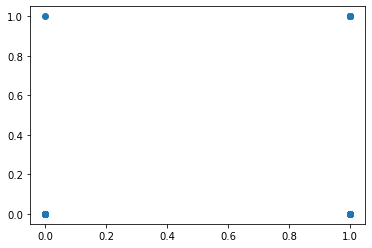

In [48]:
plt.scatter(y_test,y_pred)
plt.show()            

In [49]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [50]:
model1=DecisionTreeClassifier()
model1

DecisionTreeClassifier()

In [51]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred=model1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred)*100

87.24232504644785

In [54]:
confusion_matrix(y_test,y_pred)

array([[9247,  734],
       [ 708,  614]], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9981
           1       0.46      0.46      0.46      1322

    accuracy                           0.87     11303
   macro avg       0.69      0.70      0.69     11303
weighted avg       0.87      0.87      0.87     11303



In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model3=LogisticRegression()

In [58]:
model3.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred=model3.predict(x_test)

In [60]:
(accuracy_score(y_test,y_pred))*100

89.56914093603469

In [61]:
confusion_matrix(y_pred,y_test)

array([[9782,  980],
       [ 199,  342]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9981
           1       0.63      0.26      0.37      1322

    accuracy                           0.90     11303
   macro avg       0.77      0.62      0.66     11303
weighted avg       0.88      0.90      0.88     11303



In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model3=RandomForestClassifier(n_estimators=20)
model3

RandomForestClassifier(n_estimators=20)

In [65]:
model3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [66]:
y_pred=model3.predict(x_test)

In [67]:
(accuracy_score(y_test,y_pred))*100

89.94957091037777

In [68]:
confusion_matrix(y_test,y_pred)

array([[9745,  236],
       [ 900,  422]], dtype=int64)

In [69]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.94     10645
           1       0.32      0.64      0.43       658

    accuracy                           0.90     11303
   macro avg       0.65      0.78      0.69     11303
weighted avg       0.94      0.90      0.91     11303

